In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
desc_data = pd.read_csv('train.csv')
mol_data = pd.read_csv('unique_m.csv')

In [4]:
desc_data.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [5]:
mol_data.head(6)

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4
5,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.5La1.5Cu1O4


In [6]:
desc_data.shape

(21263, 82)

In [7]:
mol_data.shape

(21263, 88)

In [8]:
temp = mol_data['critical_temp'].sample(100)

In [9]:
desc=desc_data.iloc[temp.index]

In [10]:
temp

12113     12.5
17487      2.4
11256      5.8
1272      81.4
18807     27.3
         ...  
3162      43.0
8110     119.0
361       97.0
85        54.0
6462      26.7
Name: critical_temp, Length: 100, dtype: float64

(array([ 3.,  4.,  8.,  6., 10.,  6.,  2.,  2.,  2.,  3.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

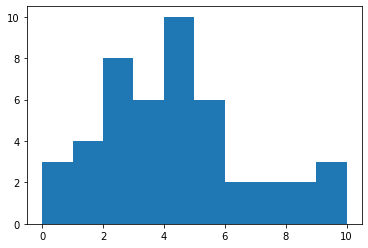

In [11]:
fig, ax = plt.subplots()
ax.hist(temp, range=[0,10])

(array([48., 16.,  5.,  2.,  8.,  1.,  6.,  9.,  3.,  2.]),
 array([  0.27 ,  12.143,  24.016,  35.889,  47.762,  59.635,  71.508,
         83.381,  95.254, 107.127, 119.   ]),
 <BarContainer object of 10 artists>)

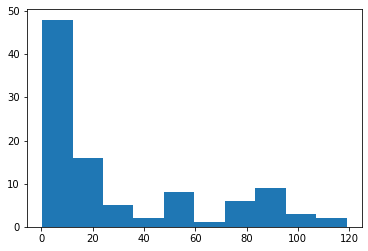

In [12]:
fig, ax = plt.subplots()
ax.hist(temp)

In [13]:
a = [np.corrcoef(temp, desc[i].tolist())[0][1] for i in desc.columns[:-1]]

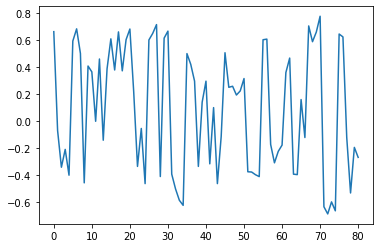

In [14]:
fig, ax = plt.subplots()

ax.plot(a)

In [15]:
count=[]
for i in range(len(a)-1):
    if abs(a[i])>0.5:
        print(desc.columns[i])
        count.append(i)

number_of_elements
entropy_atomic_mass
wtd_entropy_atomic_mass
range_atomic_mass
entropy_fie
range_fie
std_fie
wtd_std_fie
entropy_atomic_radius
wtd_entropy_atomic_radius
range_atomic_radius
std_atomic_radius
wtd_std_atomic_radius
wtd_mean_Density
gmean_Density
wtd_gmean_Density
entropy_Density
entropy_ElectronAffinity
entropy_FusionHeat
wtd_entropy_FusionHeat
range_ThermalConductivity
wtd_range_ThermalConductivity
std_ThermalConductivity
wtd_std_ThermalConductivity
mean_Valence
wtd_mean_Valence
gmean_Valence
wtd_gmean_Valence
entropy_Valence
wtd_entropy_Valence
wtd_range_Valence


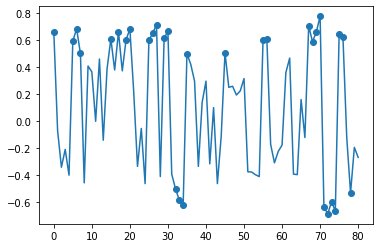

In [23]:
fig, ax = plt.subplots()

ax.plot(a)
b=[a[i] for i in count]
ax.scatter(count, b)

In [66]:
from sklearn.decomposition import PCA

In [76]:
desca = desc.iloc[:,count]

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [116]:
train, test = train_test_split(desc, train_size=80)
traina = train.iloc[:,count]
testa = test.iloc[:,count]

In [118]:
pca=PCA(n_components=10)
pca.fit(traina)
print(pca.explained_variance_ratio_)

[9.76517085e-01 2.16477553e-02 1.40101221e-03 3.31550700e-04
 4.48840830e-05 2.96072679e-05 1.58395312e-05 7.45986382e-06
 3.61769350e-06 7.42275062e-07]


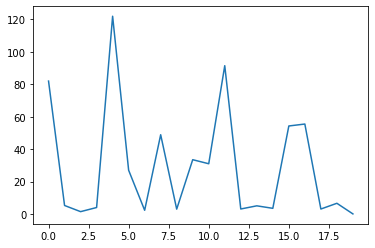

In [103]:
fig, ax = plt.subplots()

ax.plot(np.arange(20),test['critical_temp'])